In [42]:
import pandas as pd

# Load the CSV
df = pd.read_csv('NHANES.csv')

# Check that it loaded
print(df.head())


      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [43]:
y = df['RIDAGEYR']
X = df.drop(columns=['RIDAGEYR', 'age_group'], errors='ignore') 

print(X.shape, y.shape)


(2278, 8) (2278,)


In [44]:
X.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Fit Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Predict
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")




Mean Squared Error: 348.44


In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (e.g., add squared and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)  # no need to add a bias term manually
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression (deg=2) MSE: {mse_poly:.2f}")

Polynomial Regression (deg=2) MSE: 283.88


In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression (deg=2) MSE: {mse_ridge:.2f}")


Ridge Regression (deg=2) MSE: 284.05


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

rmse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {rmse_rf:.2f}")

Random Forest MSE: 277.85


In [56]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale features (optional but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and train model
boosted_model = HistGradientBoostingRegressor(random_state=42)
boosted_model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = boosted_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Boosted Model (HistGradientBoosting) MSE: {mse:.2f}")


Boosted Model (HistGradientBoosting) MSE: 283.85


Degree 1: MSE = 348.44
Degree 2: MSE = 283.88
Degree 3: MSE = 308.09
Degree 4: MSE = 12885.56
Degree 5: MSE = 232321218.26


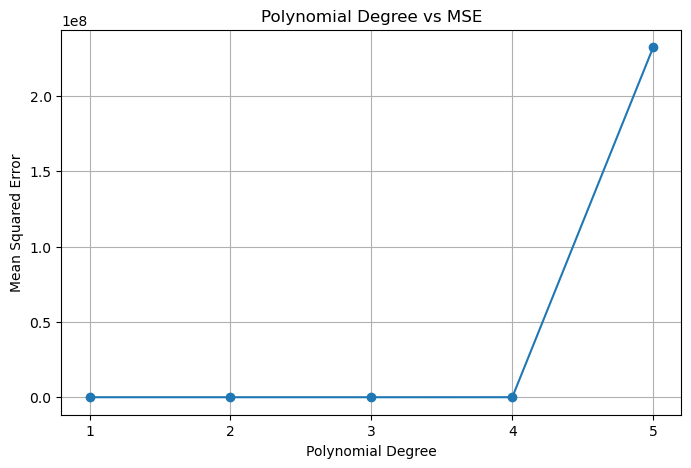

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split and scale (just once!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different degrees of polynomial features
degrees = range(1, 6)  # Try degrees 1 to 5
mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"Degree {degree}: MSE = {mse:.2f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_values, marker='o')
plt.title("Polynomial Degree vs MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.xticks(degrees)
plt.grid(True)
plt.show()


Mean Squared Error: 348.44
Polynomial Regression (deg=2) MSE: 283.88
Ridge Regression (deg=2) MSE: 284.05
Random Forest MSE: 277.85
